## 1팀 홍현경 주제분석 2주차 패키지 과제

## 1. 데이터 분할

In [1]:
import pandas as pd
import numpy as np

### 1.1 데이터 불러오기

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 1.2 x와 y 분리하기

In [3]:
train_x = train.loc[:, train.columns != 'price']
train_y = train.loc[:, ['price']]

### 1.3 validation set 분할 - 첫번째

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
tr_x, val_y, tr_y, val_y = train_test_split(train_x, train_y, test_size = 0.2)

### 1.4 질문

* 이렇게 데이터를 나눌 경우 어떠한 문제가 발생할 수 있는가? (현재 데이터에는 관측된 시간이 존재함)

### 1.5 validation set 분할 - 두번째

In [6]:
tr = train[train.transaction_year != 4]
tr_x = tr.loc[:, tr.columns != 'price']
tr_y = tr.loc[:, ['price']]

In [7]:
val = train[train.transaction_year == 4]
val_x = val.loc[:, val.columns != 'price']
val_y = val.loc[:, ['price']]

### 1.6 캣부스팅 인코딩 전에

In [8]:
! pip install category_encoders

In [9]:
from category_encoders.cat_boost import CatBoostEncoder

### 1.7 캣부스트 인코딩

In [10]:
cbe_encoder = CatBoostEncoder()

In [11]:
tr_x

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,0,5,-1.000000e+00,-1.836970e-16
1,사직동,광화문풍림스페이스본(9-0),108.55,11,0,5,-2.449294e-16,1.000000e+00
2,사직동,광화문풍림스페이스본(9-0),94.51,1,0,5,-2.449294e-16,1.000000e+00
3,수송동,로얄팰리스스위트,42.87,8,0,8,-1.000000e+00,-1.836970e-16
4,수송동,로얄팰리스스위트,39.67,15,0,8,1.000000e+00,3.061617e-16
...,...,...,...,...,...,...,...,...
416312,강일동,강일리버파크4단지,84.74,9,3,7,5.879543e-15,-1.000000e+00
416313,강일동,강일리버파크2단지,84.53,7,3,7,5.879543e-15,-1.000000e+00
416314,강일동,강일리버파크5단지,84.83,6,3,7,5.879543e-15,-1.000000e+00
416315,강일동,강일리버파크4단지,84.53,13,3,7,5.879543e-15,-1.000000e+00


In [12]:
val_x

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
2451,사직동,광화문풍림스페이스본(9-0),107.91,14,4,9,-1.000000e+00,-1.836970e-16
2452,사직동,광화문풍림스페이스본(9-0),151.81,10,4,9,-1.000000e+00,-1.836970e-16
2453,사직동,광화문풍림스페이스본(9-0),94.51,2,4,9,-2.449294e-16,1.000000e+00
2454,사직동,광화문풍림스페이스본(9-0),94.28,12,4,9,-2.449294e-16,1.000000e+00
2455,내수동,경희궁의아침4단지,145.96,13,4,13,-1.000000e+00,-1.836970e-16
...,...,...,...,...,...,...,...,...
422159,강일동,강일리버파크2단지,84.74,6,4,8,-2.204364e-15,1.000000e+00
422160,강일동,고덕리엔파크2단지,59.83,7,4,6,1.000000e+00,4.892397e-16
422161,강일동,강일리버파크5단지,59.87,1,4,8,1.000000e+00,4.892397e-16
422162,강일동,강일리버파크4단지,84.83,9,4,8,5.879543e-15,-1.000000e+00


In [13]:
tr_cbe = cbe_encoder.fit_transform(tr_x,tr_y)

In [14]:
val_cbe = cbe_encoder.transform(val_x)

In [15]:
val_cbe.head()

,dong,apt,exclusive_use_area,floor,transaction_year,until_trans,sin_date,cos_date
2451,89176.597368,86280.203194,107.91,14,4,9,-1.000000e+00,-1.836970e-16
2452,89176.597368,86280.203194,151.81,10,4,9,-1.000000e+00,-1.836970e-16
2453,89176.597368,86280.203194,94.51,2,4,9,-2.449294e-16,1.000000e+00
2454,89176.597368,86280.203194,94.28,12,4,9,-2.449294e-16,1.000000e+00
2455,103789.156533,107170.755379,145.96,13,4,13,-1.000000e+00,-1.836970e-16


## 2. 릿지 회귀 (Ridge Regression)

### 2.1 상관계수 플랏

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
tr_cbe_corr = tr_cbe.corr()

Text(0.5, 1.0, 'Correlation Matrix Plot')

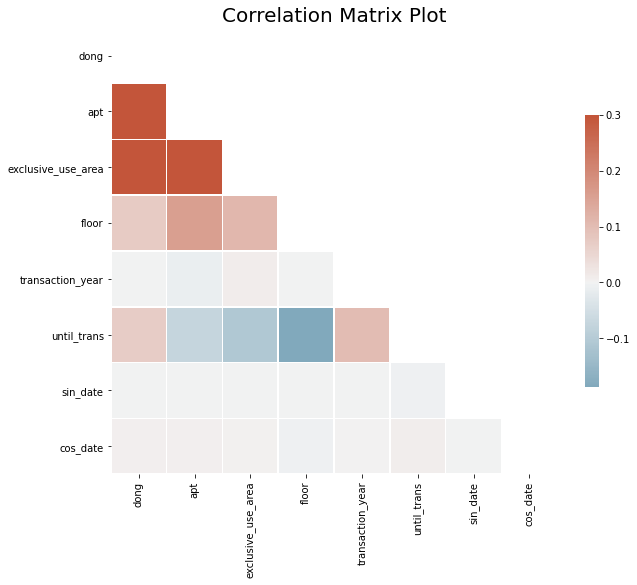

In [18]:
mask = np.triu(np.ones_like(tr_cbe_corr, dtype = bool))

plot, axis = plt.subplots(figsize = (10, 10))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(tr_cbe_corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

axis.set_title('Correlation Matrix Plot', fontsize = 20)

* 해석

### 2.2 릿지 튜닝 / 2.3 튜닝결과 시각화

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

Alpha:0.0000, Ridge Score:0.8305, MSE:218385779.2489, RMSE:14777.8814
Alpha:0.0001, Ridge Score:0.8305, MSE:218385779.2515, RMSE:14777.8814
Alpha:0.0010, Ridge Score:0.8305, MSE:218385779.2782, RMSE:14777.8814
Alpha:0.0100, Ridge Score:0.8305, MSE:218385779.5453, RMSE:14777.8814
Alpha:0.1000, Ridge Score:0.8305, MSE:218385782.2164, RMSE:14777.8815


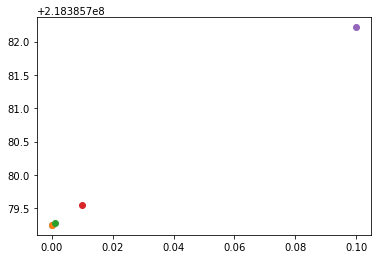

In [83]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1]

coef = []

for a in alpha:
    ridge = Ridge(alpha=a).fit(tr_x,tr_y)
    score = ridge.score(val_x, val_y)
    pred_y = ridge.predict(val_x)
    mse = mean_squared_error(val_y, pred_y)
    print("Alpha:{0:.4f}, Ridge Score:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}".format(a, score, mse, np.sqrt(mse)))
    plt.scatter(a, mse)

### 2.4 해석

### 2.5 선형 모형

In [63]:
from sklearn.linear_model import LinearRegression

In [69]:
linear = LinearRegression().fit(tr_x, tr_y)
score = linear.score(val_x, val_y)
pred_y = linear.predict(val_x)
mse = mean_squared_error(val_y, pred_y)
print("MSE: %.4f, RMSE:%.4f" %(mse, np.sqrt(mse)))

MSE: 218385779.2486, RMSE:14777.8814


## 3. LightGBM

In [75]:
! pip install lightgbm

### 3.1 LightGBM 이해

### 3.2 LGBM 튜닝

In [78]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMRegressor

OSError: dlopen(/Users/hyungyeonghong/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/hyungyeonghong/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found